In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# 1. Cargar dataset
url = "https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/depos.csv"
data = pd.read_csv(url)
# Cleanup 
data = data.dropna()
data['rooms'] = data['rooms'].str.replace(r'\D+', '', regex=True)
X = data[['total_square', 'rooms']]
y = data['price']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Configurar pipeline y grid
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', Ridge())
])

param_grid = {
    'model__alpha': [0.1, 1.0, 10.0],  # Hiperparámetro de regularización
    'model__fit_intercept': [True, False]
}

# 3. Buscar mejores hiperparámetros
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

# 4. Evaluar el mejor modelo
y_pred = grid.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mejor configuración:", grid.best_params_)
print(f"MSE en el conjunto de prueba: {mse:.2f}")


Mejor configuración: {'model__alpha': 10.0, 'model__fit_intercept': True}
MSE en el conjunto de prueba: 83268791105.62


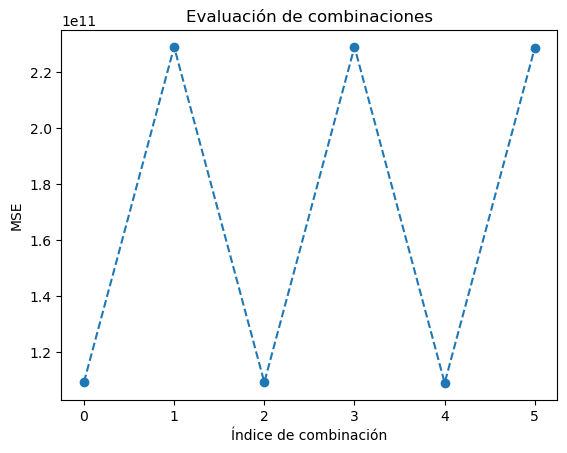

In [12]:
import matplotlib.pyplot as plt

results = pd.DataFrame(grid.cv_results_)
plt.plot(results['mean_test_score'] * -1, marker='o', linestyle='--')
plt.title('Evaluación de combinaciones')
plt.xlabel('Índice de combinación')
plt.ylabel('MSE')
plt.show()


In [14]:
print (results)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.034511      0.037573         0.000000        0.000000   
1       0.009031      0.008373         0.003537        0.006097   
2       0.009777      0.003275         0.001784        0.003130   
3       0.002826      0.003525         0.005128        0.006527   
4       0.009377      0.007657         0.003127        0.006253   
5       0.015707      0.000220         0.000000        0.000000   

   param_model__alpha  param_model__fit_intercept  \
0                 0.1                        True   
1                 0.1                       False   
2                 1.0                        True   
3                 1.0                       False   
4                10.0                        True   
5                10.0                       False   

                                              params  split0_test_score  \
0  {'model__alpha': 0.1, 'model__fit_intercept': ...      -9.139905e+10   
1  {'mod

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Extraer resultados
results = pd.DataFrame(grid.cv_results_)

# Convertir MSE negativo a positivo
results['mean_test_score'] = results['mean_test_score'] * -1

# Crear matriz para heatmap
heatmap_data = results.pivot(
    index='param_model__fit_intercept',  # Fila: fit_intercept (True/False)
    columns='param_model__alpha',       # Columna: alpha
    values='mean_test_score'            # Valor: MSE
)


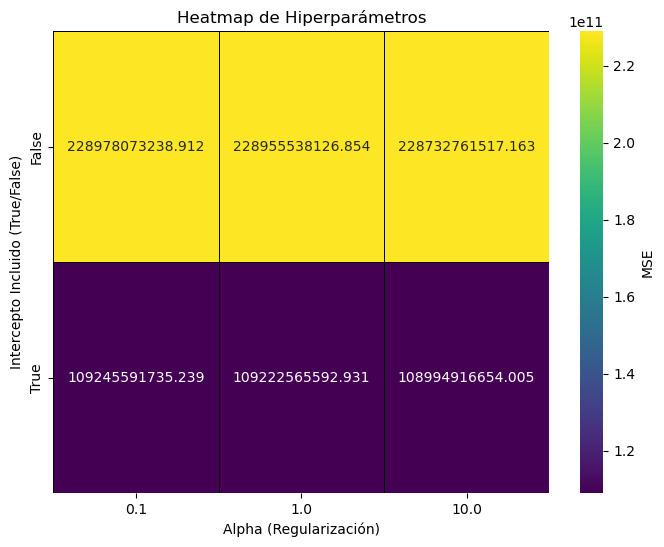

In [9]:
# Crear heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'MSE'},
    linewidths=0.5, linecolor='black'
)
plt.title('Heatmap de Hiperparámetros')
plt.xlabel('Alpha (Regularización)')
plt.ylabel('Intercepto Incluido (True/False)')
plt.show()
